<a href="https://colab.research.google.com/github/vyom-devgan/machine/blob/main/Assignment_3_Vyom_Devgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_excel('Online Retail.xlsx')

In [ ]:
len(df["StockCode"].unique())

4070

In [ ]:
pivot = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum', fill_value=0)

In [ ]:
pivot.max().sort_values()

StockCode
21412         0
79320         0
85023C        0
35832         0
85098B        0
          ...  
21915      8120
17003     10077
84077     10080
22197     11692
84826     12540
Length: 3684, dtype: int64

In [ ]:
pivot.columns = pivot.columns.astype(str)

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(pivot)

In [ ]:
pca = PCA(n_components=3)
scaled_pca = pca.fit_transform(scaled)

In [ ]:
scaled_df = pd.DataFrame(data=scaled, columns=pivot.columns, index=pivot.index)

In [ ]:
scaled_pca_df = pd.DataFrame(data=scaled_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'], index=pivot.index)

In [ ]:
# 3D visualization of the transformed data.
import plotly.express as px
fig = px.scatter_3d(scaled_pca_df, x='Principal Component 1', y='Principal Component 2', z='Principal Component 3', title='Scaled PCA DataFrame')
fig.show()

K - Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

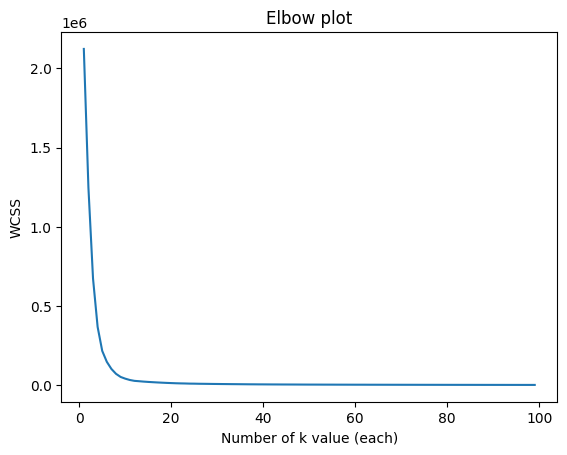

In [ ]:
wcss = []

for each in range(1, 100):
    kmeans = KMeans(n_clusters=each)
    kmeans.fit(scaled_pca_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 100), wcss)
plt.title('Elbow plot')
plt.xlabel("Number of k value (each)")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans1 = KMeans(n_clusters=4)
cluster_k = kmeans1.fit_predict(scaled_pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
km_df = pd.DataFrame(scaled_pca_df, columns=scaled_pca_df.columns, index=scaled_pca_df.index)
km_df['cluster'] = cluster_k
km_df['cluster'].value_counts(ascending=True)

2       1
1       2
3       4
0    4365
Name: cluster, dtype: int64

Clustering with Hieracrhy

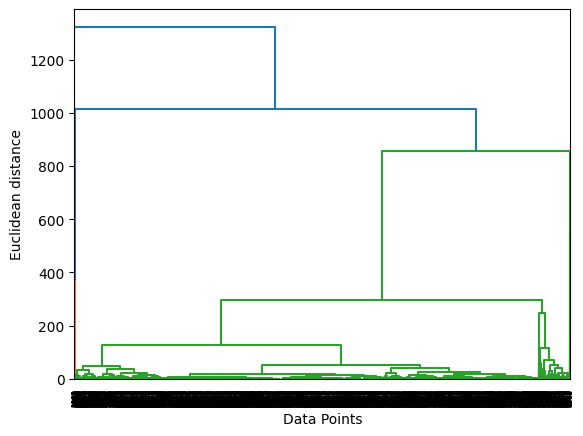

In [ ]:
merging = linkage(scaled_pca_df.drop(columns=['cluster']), method='ward')
dendrogram(merging, leaf_rotation=90)
plt.xlabel('Data Points')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
Z = linkage(scaled_pca_df.drop(columns=['cluster']), method='ward')

clusters_hierarchical = fcluster(Z, 4, criterion='maxclust') # Exactly 4 clusters

In [ ]:
with_hierarchical_df = pd.DataFrame(scaled_pca_df, columns=scaled_pca_df.columns, index=scaled_pca_df.index)
with_hierarchical_df['cluster'] = clusters_hierarchical

DBSCAN

In [ ]:
dbscan = DBSCAN(eps=100, min_samples=10)

In [ ]:
cluster_dbscan = dbscan.fit_predict(scaled_pca)

In [ ]:
with_dbscan_df = pd.DataFrame(scaled_pca_df, columns=scaled_pca_df.columns, index=scaled_pca_df.index)
with_dbscan_df['cluster'] = cluster_dbscan

In [ ]:
fig = px.scatter_3d(km_df, x='Principal Component 1', y='Principal Component 2', z='Principal Component 3', color='cluster', title='K-Means')
fig.show()

In [ ]:
fig = px.scatter_3d(with_hierarchical_df, x='Principal Component 1', y='Principal Component 2', z='Principal Component 3', color='cluster', title='Hierarchical')
fig.show()

In [ ]:
fig = px.scatter_3d(with_dbscan_df, x='Principal Component 1', y='Principal Component 2', z='Principal Component 3', color='cluster', title='DB Scan')
fig.show()